<a href="https://colab.research.google.com/github/Smasko7/Machine-Learning-Course/blob/main/Exercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

## 1. Load the dataset and see if it is balanced

In [18]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [51]:
print("Dataset shape: ", df.shape)
X = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

Dataset shape:  (7613, 5)


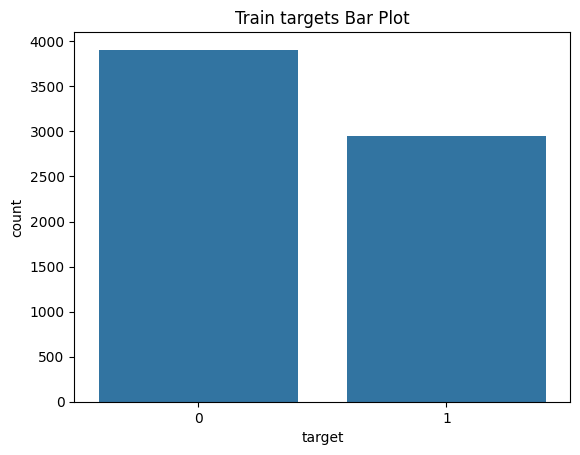

In [31]:
y_train = pd.DataFrame(y_train)
sns.countplot(x='target', data=y_train)
plt.title("Train targets Bar Plot")
plt.show()


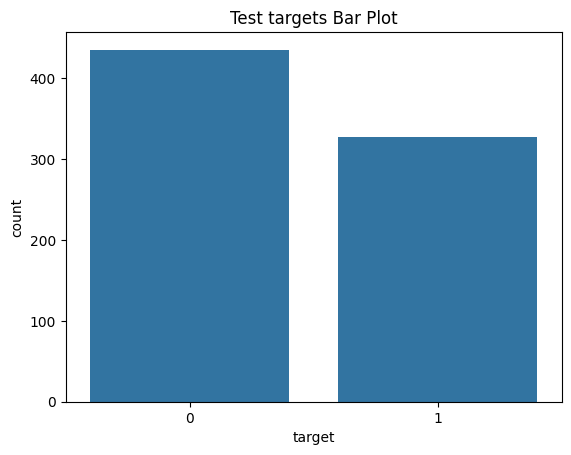

In [32]:
y_test = pd.DataFrame(y_test)
sns.countplot(x='target', data=y_test)
plt.title("Test targets Bar Plot")
plt.show()

In [45]:
y_train = pd.DataFrame(y_train)
counts = y_train['target'].value_counts()
print("For train dataset:")
print(f"Target 0: {counts[0]} --> {counts[0] / (counts[0] + counts[1]) * 100} %")
print(f"Target 1: {counts[1]} --> {counts[1] / (counts[0] + counts[1]) * 100} %")


For train dataset:
Target 0: 3907 --> 57.0281710699168 %
Target 1: 2944 --> 42.9718289300832 %


As we can see, the dataset is slightly imbalanced, because there are 57% samples with target 0 and 43% with target 1.

## 2.

### a. Remove the id and location columns

In [65]:
x_train_clean = x_train.drop(columns=['id', 'location'])
x_test_clean = x_test.drop(columns=['id', 'location'])



Train text column contains 0 null values
Train keyword column contains 54 null values
Test text column contains 0 null values
Test keyword column contains 7 null values


### b. Fill the NaN values with "null"

In [ ]:
print(f"Train text column contains {sum(x_train_clean['text'].isnull())} null values")
print(f"Train keyword column contains {sum(x_train_clean['keyword'].isnull())} null values")
print(f"Test text column contains {sum(x_test_clean['text'].isnull())} null values")
print(f"Test keyword column contains {sum(x_test_clean['keyword'].isnull())} null values")

x_train_clean['keyword'] = x_train_clean['keyword'].fillna('null')
x_test_clean['keyword'] = x_test_clean['keyword'].fillna('null')

### c. Combine keywords and texts

In [68]:
x_train_clean['inputs'] = x_train_clean['keyword'] + ' ' + x_train_clean['text']
x_test_clean['inputs'] = x_test_clean['keyword'] + ' ' + x_test_clean['text']

x_train_clean.head()

,keyword,text,inputs
6669,threat,Meek Mill responds to DrakeÛªs OVO Fest set w...,threat Meek Mill responds to DrakeÛªs OVO Fes...
3940,flood,survived the plague\nfloated the flood\njust p...,flood survived the plague\nfloated the flood\n...
7217,weapons,#Kick Hendrixonfire @'=BLACKCATS= | BIG NOOB ...,weapons #Kick Hendrixonfire @'=BLACKCATS= | B...
2234,deluge,Vince McMahon once again a billionaire: I reme...,deluge Vince McMahon once again a billionaire:...
4233,hazardous,Is it possible to sneak into a hospital so I c...,hazardous Is it possible to sneak into a hospi...


## 3. Preprocess the tweets.

In [74]:
import re

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','atUser',text)
    return text

def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])
    return text




<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\)'
<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\)'
/tmp/ipython-input-1128010766.py:11: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
/tmp/ipython-input-1128010766.py:17: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('@[^\s]+','atUser',text)
/tmp/ipython-input-1128010766.py:27: SyntaxWarning: invalid escape sequence '\)'
  text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)


In [101]:
def preprocess_text(text):
  text = removeUnicode(text)
  text = replaceURL(text)
  text = replaceAtUser(text)
  text = removeHashtagInFrontOfWord(text)
  text = replaceMultiExclamationMark(text)
  text = replaceMultiQuestionMark(text)
  text = replaceMultiStopMark(text)
  text = removeNumbers(text)

  return text


x_test_clean['inputs'] = x_test_clean['inputs'].apply(preprocess_text)
x_train_clean['inputs'] = x_train_clean['inputs'].apply(preprocess_text)

x_train_clean.head()

,keyword,text,inputs
6669,threat,Meek Mill responds to DrakeÛªs OVO Fest set w...,threat Meek Mill responds to Drakes OVO Fest s...
3940,flood,survived the plague\nfloated the flood\njust p...,flood survived the plague\nfloated the flood\n...
7217,weapons,#Kick Hendrixonfire @'=BLACKCATS= | BIG NOOB ...,weapons Kick Hendrixonfire atUser | BIG NOOB ...
2234,deluge,Vince McMahon once again a billionaire: I reme...,deluge Vince McMahon once again a billionaire:...
4233,hazardous,Is it possible to sneak into a hospital so I c...,hazardous Is it possible to sneak into a hospi...


The functions that were used to preprocess the texts of the dataset are:

1.   removeUnicode: Removes unicode strings like "\u002c" and "x96". This way, it eliminates symbols that add noise without providing semantic disaster context.
2.   replaceURL: Converts all links to "url", as the specific address is irrelevant to identifying the target.
3.   replaceAtUser: Replaces '@' with 'AtUser' to eliminate the '@' characters from the text and replace them with a single word.
4.   removeHashtagInFrontOfWord: Converts hashtags (e.g., #fire) into regular words so the model recognizes them as standard vocabulary terms.
5.   removeEmoticons: It removes the emoticons like ':P' which may have sarcastic meaning and confuse the model rather than help it distinguish the true targets.
6.   replaceMultiExclamationMark, replaceMultiQuestionMark, replaceMultiStopMark: These functions replace the repetitions of the punctuation marks into a single token (word) to better capture the extreme emotions.
7.   removeNumbers: Removes the numbers (like casualty counts or times) that may vary per event, forcing the model to learn general linguistic patterns.



## 4. Isolate the final input tweets and convert the targets into numpy arrays.


In [108]:
train_inputs = x_train_clean['inputs']
test_inputs = x_test_clean['inputs']

y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

## 5. Convert the input texts (tweets) into tf-idf format.

In [114]:
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(train_inputs)

X_test_tfidf = tfidf.transform(test_inputs)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

# print(X_train_tfidf)



(6851, 13489)
(762, 13489)


## 6. Train a linear SVM to detect the disasters.

In [117]:
svc_model = LinearSVC()
svc_model.fit(X_train_tfidf, y_train_numpy)

train_pred = svc_model.predict(X_train_tfidf)
test_pred = svc_model.predict(X_test_tfidf)

train_report = classification_report(y_train_numpy, train_pred, digits=4)
test_report = classification_report(y_test_numpy, test_pred, digits=4)

print("Train classification report:")
print(train_report)

print("Test classification report:")
print(test_report)


Train classification report:
              precision    recall  f1-score   support

           0     0.9514    0.9829    0.9669      3907
           1     0.9762    0.9334    0.9543      2944

    accuracy                         0.9616      6851
   macro avg     0.9638    0.9581    0.9606      6851
weighted avg     0.9621    0.9616    0.9615      6851

Test classification report:
              precision    recall  f1-score   support

           0     0.8110    0.8483    0.8292       435
           1     0.7850    0.7370    0.7603       327

    accuracy                         0.8005       762
   macro avg     0.7980    0.7926    0.7947       762
weighted avg     0.7998    0.8005    0.7996       762



In [118]:
train_accuracy = accuracy_score(y_train_numpy, train_pred)
test_accuracy = accuracy_score(y_test_numpy, test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Train accuracy: 0.9616114435848782
Test accuracy: 0.800524934383202


The most important metric for the specific problem is **Recall**.
This is because, if a disaster is happening, it is important that our model detects it through tweets. In other words, the cost of false negative, which is failing to detect a real disaster, is much higher than the cost of false positive, which is sending an alert when there is no disaster.

## 7. Apply PCA and compare (PCA + linearSVC) vs (PCA + rbf SVC).

In [121]:
pca_info_threshold = 0.95

X_train_tfidf_array = X_train_tfidf.toarray()
X_test_tfidf_array = X_test_tfidf.toarray()

pca = PCA(n_components=pca_info_threshold, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_tfidf_array)
X_test_pca = pca.transform(X_test_tfidf_array)

pca_n_components = pca.n_components_

In [123]:
print("Train shape before PCA: ", X_train_tfidf.shape)
print("Test shape before PCA: ", X_test_tfidf.shape)

print("Train shape after PCA: ", X_train_pca.shape)
print("Test shape after PCA: ", X_test_pca.shape)

Train shape before PCA:  (6851, 13489)
Test shape before PCA:  (762, 13489)
Train shape after PCA:  (6851, 3722)
Test shape after PCA:  (762, 3722)


In [126]:
linear_svc_model = LinearSVC()
rbf_svc_model = SVC(kernel='rbf')

linear_svc_model.fit(X_train_pca, y_train_numpy)
rbf_svc_model.fit(X_train_pca, y_train_numpy)

linear_svc_train_pred = linear_svc_model.predict(X_train_pca)
linear_svc_test_pred = linear_svc_model.predict(X_test_pca)

linear_svc_train_report = classification_report(y_train_numpy, linear_svc_train_pred, digits=4)
linear_svc_test_report = classification_report(y_test_numpy, linear_svc_test_pred, digits=4)

linear_svc_train_accuracy = accuracy_score(y_train_numpy, linear_svc_train_pred)
linear_svc_test_accuracy = accuracy_score(y_test_numpy, linear_svc_test_pred)


rbf_svc_train_pred = rbf_svc_model.predict(X_train_pca)
rbf_svc_test_pred = rbf_svc_model.predict(X_test_pca)

rbf_svc_train_report = classification_report(y_train_numpy, rbf_svc_train_pred, digits=4)
rbf_svc_test_report = classification_report(y_test_numpy, rbf_svc_test_pred, digits=4)

rbf_svc_train_accuracy = accuracy_score(y_train_numpy, rbf_svc_train_pred)
rbf_svc_test_accuracy = accuracy_score(y_test_numpy, rbf_svc_test_pred)

print("==========================================================================")
print("PCA + Linear SVC: ")
print("==========================================================================")

print(f"Train accuracy: {linear_svc_train_accuracy}")
print(f"Test accuracy: {linear_svc_test_accuracy}")

print("Train classification report:")
print(linear_svc_train_report)

print("Test classification report:")
print(linear_svc_test_report)

print("==========================================================================\n\n")

print("==========================================================================")
print("PCA + RBF kernel SVC: ")
print("==========================================================================")

print(f"Train accuracy: {rbf_svc_train_accuracy}")
print(f"Test accuracy: {rbf_svc_test_accuracy}")

print("Train classification report:")
print(rbf_svc_train_report)

print("Test classification report:")
print(rbf_svc_test_report)

PCA + Linear SVC: 
Train accuracy: 0.9366515837104072
Test accuracy: 0.8083989501312336
Train classification report:
              precision    recall  f1-score   support

           0     0.9249    0.9675    0.9457      3907
           1     0.9541    0.8957    0.9240      2944

    accuracy                         0.9367      6851
   macro avg     0.9395    0.9316    0.9348      6851
weighted avg     0.9374    0.9367    0.9364      6851

Test classification report:
              precision    recall  f1-score   support

           0     0.8204    0.8506    0.8352       435
           1     0.7910    0.7523    0.7712       327

    accuracy                         0.8084       762
   macro avg     0.8057    0.8014    0.8032       762
weighted avg     0.8078    0.8084    0.8077       762



PCA + RBF kernel SVC: 
Train accuracy: 0.9436578601663991
Test accuracy: 0.8123359580052494
Train classification report:
              precision    recall  f1-score   support

           0     0.9251

We can see that the RBF kernel SVC has superior performance compared to the linearSVC, as almost all of its metrics are slighty higher. Surprisingly, the recall value of class 1 (disaster) is the same for the 2 models. However, by fine-tuning the parameters C and gamma, the model with RBF kernel will almost certainly outperform the linear SVM.

Also, we can conclude that the linear model shows decent performance, which means that the data are probably linearly seperable, even after the dimensionality reduction that PCA induces.

## 8. Gamma Value

When gamma is set to 'scale' in the SVC function, the value of gamma is 1 / (n_features * X.var()), which accounts for 1/(3722 * 0.00025) = 1.067, while when set to 'auto', gamma equals 1 / n_features = 1/6851 = 2,68 * 10^(-4).

In [128]:
rbf_gamma_auto_svc_model = SVC(kernel='rbf', gamma='auto')

rbf_gamma_auto_svc_model.fit(X_train_pca, y_train_numpy)


rbf_gamma_auto_svc_train_pred = rbf_gamma_auto_svc_model.predict(X_train_pca)
rbf_gamma_auto_svc_test_pred = rbf_gamma_auto_svc_model.predict(X_test_pca)

rbf_gamma_auto_svc_train_report = classification_report(y_train_numpy, rbf_gamma_auto_svc_train_pred, digits=4)
rbf_gamma_auto_svc_test_report = classification_report(y_test_numpy, rbf_gamma_auto_svc_test_pred, digits=4)

rbf_gamma_auto_svc_train_accuracy = accuracy_score(y_train_numpy, rbf_gamma_auto_svc_train_pred)
rbf_gamma_auto_svc_test_accuracy = accuracy_score(y_test_numpy, rbf_gamma_auto_svc_test_pred)

print("==========================================================================")
print("PCA + RBF kernel SVC with gamma = 'auto': ")
print("==========================================================================")

print(f"Train accuracy: {rbf_gamma_auto_svc_train_accuracy}")
print(f"Test accuracy: {rbf_gamma_auto_svc_test_accuracy}")

print("Train classification report:")
print(rbf_gamma_auto_svc_train_report)

print("Test classification report:")
print(rbf_gamma_auto_svc_test_report)

PCA + RBF kernel SVC with gamma = 'auto': 
Train accuracy: 0.570281710699168
Test accuracy: 0.5708661417322834
Train classification report:
              precision    recall  f1-score   support

           0     0.5703    1.0000    0.7263      3907
           1     0.0000    0.0000    0.0000      2944

    accuracy                         0.5703      6851
   macro avg     0.2851    0.5000    0.3632      6851
weighted avg     0.3252    0.5703    0.4142      6851

Test classification report:
              precision    recall  f1-score   support

           0     0.5709    1.0000    0.7268       435
           1     0.0000    0.0000    0.0000       327

    accuracy                         0.5709       762
   macro avg     0.2854    0.5000    0.3634       762
weighted avg     0.3259    0.5709    0.4149       762



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

We can see that the gamma = 'auto' option significantly reduces the performance of the RBF SVC model, because it does not take into consideration the variance of the features

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


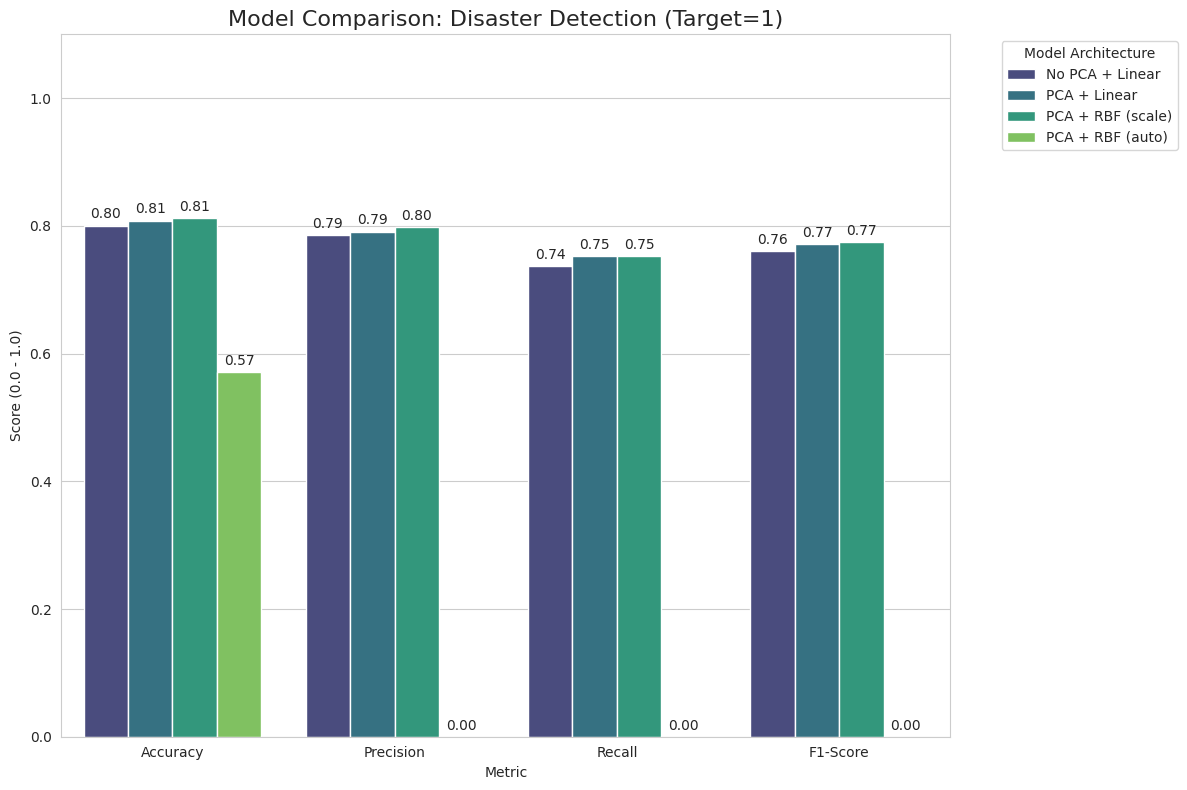

In [137]:
report_1 = classification_report(y_test_numpy, test_pred, output_dict=True)
report_2 = classification_report(y_test_numpy, linear_svc_test_pred, output_dict=True)
report_3 = classification_report(y_test_numpy, rbf_svc_test_pred, output_dict=True)
report_4 = classification_report(y_test_numpy, rbf_gamma_auto_svc_test_pred, output_dict=True)

def extract_metrics(report, model_name):
    return {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }

data = [
    extract_metrics(report_1, "No PCA + Linear"),
    extract_metrics(report_2, "PCA + Linear"),
    extract_metrics(report_3, "PCA + RBF (scale)"),
    extract_metrics(report_4, "PCA + RBF (auto)")
]

df_compare = pd.DataFrame(data)


plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plot = sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="viridis")

# Add data labels on top of bars
for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)

plt.title("Model Comparison: Disaster Detection (Target=1)", fontsize=16)
plt.ylim(0, 1.1)
plt.ylabel("Score (0.0 - 1.0)")
plt.legend(title="Model Architecture", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

We only keep the metrics for target=1, because we are more interested in predicting the event of disaster.

## 9. Gaussian Naive Bayes

In [141]:
gnb_model = GaussianNB()

# gnb_model.fit(X_train_tfidf, y_train)

gnb_model.fit(X_train_tfidf_array, y_train_numpy)

train_pred_gnb = gnb_model.predict(X_train_tfidf_array)
test_pred_gnb = gnb_model.predict(X_test_tfidf_array)

train_report_gnb = classification_report(y_train_numpy, train_pred_gnb, digits=4)
test_report_gnb = classification_report(y_test_numpy, test_pred_gnb, digits=4)

print("Train Gaussian Naive Bayes Classification Report:")
print(train_report_gnb)

print("Test Gaussian Naive Bayes Classification Report:")
print(test_report_gnb)


Train Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.7878    0.8813      3907
           1     0.7803    1.0000    0.8766      2944

    accuracy                         0.8790      6851
   macro avg     0.8901    0.8939    0.8789      6851
weighted avg     0.9056    0.8790    0.8793      6851

Test Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0     0.7645    0.4851    0.5935       435
           1     0.5391    0.8012    0.6445       327

    accuracy                         0.6207       762
   macro avg     0.6518    0.6431    0.6190       762
weighted avg     0.6678    0.6207    0.6154       762



It is shown that the Gaussian Naive Bayes model performs well on recall for target 1, but has worse perfomance than the other models (apart from rbf 'auto') in the other metrics.